In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Calibration')

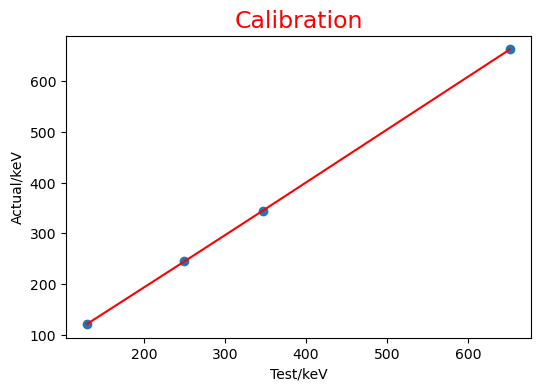

In [4]:
E = [121.7824, 244.692, 344.275, 661.661]
t = [129.92, 249.93, 346.49, 651.62]
plt.figure(dpi=100)
plt.plot(t,E,color='r')
plt.scatter(t,E)
plt.xlabel("Test/keV")
plt.ylabel("Actual/keV")
plt.title("Calibration",size=17,color='r')

In [5]:
z1 = np.polyfit(t, E, 1)  #一次多项式拟合，相当于线性拟合
p1 = np.poly1d(z1)
print (z1)  #[ 1.          1.49333333]
print (p1)  # 1 x + 1.493

[  1.03563515 -13.6633532 ]
 
1.036 x - 13.66


In [6]:
theta = list(range(30,130,10))
theta = np.array(theta)

In [7]:
peak = np.array([547.35, 494.95, 438.98, 391.21, 350.94, 315.49, 285.60, 263.93, 241.82, 227.20])
peak = peak * 1.036 -13.66

In [8]:
E_theta = np.poly1d(np.polyfit(theta,peak,5))

In [9]:
Er=1/(1/553.3946-(1-np.sqrt(3)/2)/511)

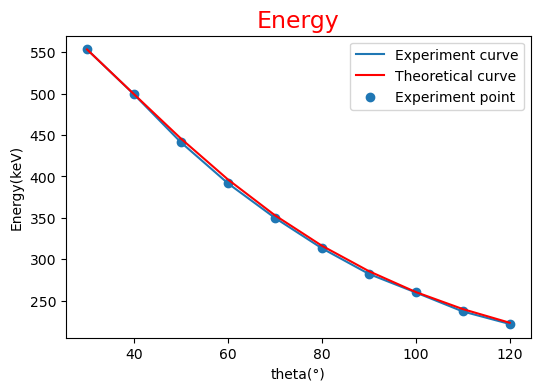

In [10]:
plt.figure(dpi=100)
plt.scatter(theta,peak,label="Experiment point")
plt.plot(theta,peak,label="Experiment curve")
plt.plot(theta,Er/(1+Er/511*(1-np.cos(theta/180*np.pi))),label="Theoretical curve",color='r')
plt.ylabel("Energy(keV)")
plt.xlabel("theta(°)")
plt.title("Energy",size=17,color='r')
plt.legend(loc="best")

In [11]:
area = [4792, 4209, 3175, 2997, 2508, 2192, 2159, 2316, 2326, 2402]
area = np.array(area)

In [12]:
E_fit1 = np.array([0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.8,1])
E_fit1 = E_fit1*1000
eta = np.array([10.9,10.7,10.4,9.17,8.11,7.37,6.87,6.17,5.69])*1e-4
fit1 = np.poly1d(np.polyfit(E_fit1,eta,2))
print(fit1)

           2
6.231e-10 x - 1.293e-06 x + 0.001241


In [13]:
E_fit2 = np.array([0.2,0.3,0.4,0.5,0.6,0.662,0.8,1])
E_fit2 = E_fit2*1000
R = np.array([0.8841,0.7236,0.5875,0.4912,0.4266,0.3914,0.3373,0.2977])
fit2 = np.poly1d(np.polyfit(E_fit2,R,2))
print(fit2)

           2
1.048e-06 x - 0.001962 x + 1.222


In [14]:
sigma = area / fit1(E_theta(theta)) / fit2(E_theta(theta))
sigma = sigma/sigma[0]

In [15]:
#theory
a = Er/511
print(a)
a = 1.29

1.266757396677492


In [16]:
testaa = (1+np.cos(theta/180*np.pi)**2) / (1+a*(1-np.cos(theta/180*np.pi)))**2  * ( 1 + a**2*(1-np.cos(theta/180*np.pi))**2/(1+np.cos(theta/180*np.pi)**2)/(1+a*(1-np.cos(theta/180*np.pi))) )
testaa = testaa / testaa[0]

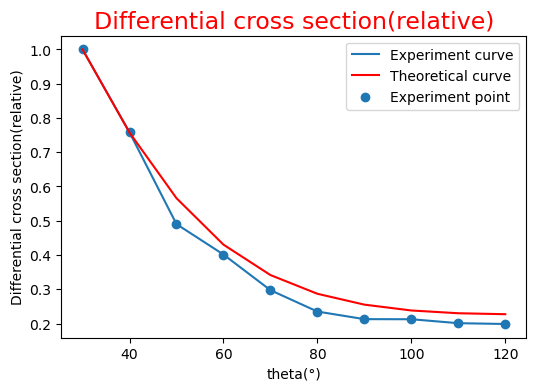

In [17]:
plt.figure(dpi=100)
plt.plot(theta,sigma,label="Experiment curve")
plt.scatter(theta,sigma,label="Experiment point")
plt.plot(theta, testaa,label = "Theoretical curve",color='r')
plt.xlabel("theta(°)")
plt.ylabel("Differential cross section(relative)")
plt.title("Differential cross section(relative)",size=17,color='r')
plt.legend(loc= "best")

In [18]:
np.array([1,2])/np.array([3,1])

array([0.33333333, 2.        ])

In [19]:
Er

647.3130297021985

In [20]:
fit1(E_theta(30))

0.0007164956174233007

In [21]:
fit2(E_theta(30))

0.45661096688349534

In [22]:
Er/(1+Er/511*(1-np.cos(theta/180*np.pi)))

array([553.3946    , 499.32932744, 445.65396835, 396.3030927 ,
       353.0475754 , 316.25808652, 285.56784712, 260.30718165,
       239.74432849, 223.20091489])

In [23]:
peak

array([553.3946 , 499.1082 , 441.12328, 391.63356, 349.91384, 313.18764,
       282.2216 , 259.77148, 236.86552, 221.7192 ])

In [27]:
(peak-Er/(1+Er/511*(1-np.cos(theta/180*np.pi))))/peak

array([ 2.05435394e-16, -4.43045101e-04, -1.02707986e-02, -1.19232190e-02,
       -8.95573437e-03, -9.80385600e-03, -1.18568073e-02, -2.06220348e-03,
       -1.21537677e-02, -6.68284427e-03])